In [34]:
import pandas as pd

In [22]:
lng_df = pd.read_csv("LNG.csv")

In [23]:
spy_df = pd.read_csv("SPY.csv")

In [24]:
lng_df.set_index('Date')
spy_df.set_index('Date')

,Adj_Close,Adj_Volume
Date,,
1993-01-29,28.223927,1003200.0
1993-02-01,28.424666,480500.0
1993-02-02,28.484856,201300.0
1993-02-03,28.785997,529400.0
1993-02-04,28.906440,531500.0
1993-02-05,28.886334,492100.0
1993-02-08,28.886334,596100.0
1993-02-09,28.685595,122100.0
1993-02-10,28.725743,379600.0


In [37]:
lng_df.head()  # examine the DataFrames
pd.DataFRamce.reset_index()
spy_df.head()  # examine the SPY DataFrame

AttributeError: module 'pandas' has no attribute 'DataFRamce'

NameError: name 'plt' is not defined

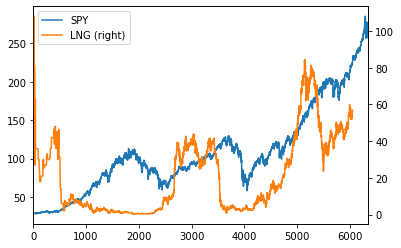

In [26]:
# Plot the Adj_Close columns for SPY and LNG
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()  # show the plot

In [7]:
plt.clf()  # clear the plot space

NameError: name 'plt' is not defined

NameError: name 'plt' is not defined

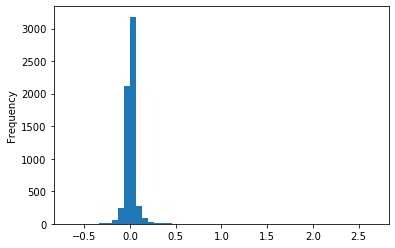

In [8]:
# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()